Os dados usados no projeto se encontra nesse link:
https://drive.google.com/file/d/1MP3JfSvjZ8TcaVIRKmp3IVumJI-AW-0o/view?usp=share_link

In [486]:
# importando as bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [487]:
# importando o arquivo bovespa
from google.colab import files
arquivo = files.upload()

Saving all_bovespa.csv to all_bovespa (6).csv


In [513]:
# data frame
df = pd.read_csv('all_bovespa.csv', delimiter=',')

In [514]:
df

,data_pregao,sigla_acao,nome_acao,preco_abertura,preco_maximo,preco_minimo,preco_fechamento,qtd_negocios,volume_negocios
0,2020-01-02,AALR3,ALLIAR,18.29,19.00,18.28,19.00,585800,1094619600
1,2020-01-02,AAPL34,APPLE,120.00,121.34,120.00,121.34,12700,153338000
2,2020-01-02,ABCB4,ABC BRASIL,20.00,20.30,19.82,20.30,870400,1745787800
3,2020-01-02,ABEV3,AMBEV S/A,18.86,19.25,18.78,19.20,16011300,-2147483648
4,2020-01-02,ADHM3,ADVANCED-DH,2.55,2.55,2.35,2.48,193400,47192700
...,...,...,...,...,...,...,...,...,...
500826,2022-11-25,EMAE4,EMAE,40.00,41.08,40.00,41.08,600,2417400
500827,2022-11-25,EMBR3,EMBRAER,14.50,14.64,14.30,14.31,3989300,-2147483648
500828,2022-11-25,INEP3,INEPAR,1.20,1.34,1.18,1.26,7311600,927275800
500829,2022-11-25,INEP4,INEPAR,1.09,1.20,1.05,1.11,2672500,303750800


In [552]:
# filtrar ações
df_itau = df[df['sigla_acao'] == 'ITUB4']
df_petro = df[df['sigla_acao'] == 'PETR4']
df_sinq = df[df['sigla_acao'] == 'SQIA3']

In [553]:
# filtrar as datas
# é possível escolher entre 2020-01-01 e 2022-12-31.

df_itau_2022=df_itau[df_itau['data_pregao']>='2022-11-01']
df_petro_2022=df_petro[df_petro['data_pregao']>='2022-11-01']
df_sinq_2022=df_sinq[df_sinq['data_pregao']>='2022-11-01']


In [554]:
# formatando as datas
df_itau['data_pregao']=pd.to_datetime(df_itau['data_pregao'],format='%Y-%m-%d')
df_itau = df_itau.set_index('data_pregao')

df_petro['data_pregao']=pd.to_datetime(df_petro['data_pregao'],format='%Y-%m-%d')
df_petro = df_petro.set_index('data_pregao')

df_sinq['data_pregao']=pd.to_datetime(df_sinq['data_pregao'],format='%Y-%m-%d')
df_sinq = df_sinq.set_index('data_pregao')

<ipython-input-554-4bbfa402a098>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_itau['data_pregao']=pd.to_datetime(df_itau['data_pregao'],format='%Y-%m-%d')
<ipython-input-554-4bbfa402a098>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_petro['data_pregao']=pd.to_datetime(df_petro['data_pregao'],format='%Y-%m-%d')
<ipython-input-554-4bbfa402a098>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

<AxesSubplot:>

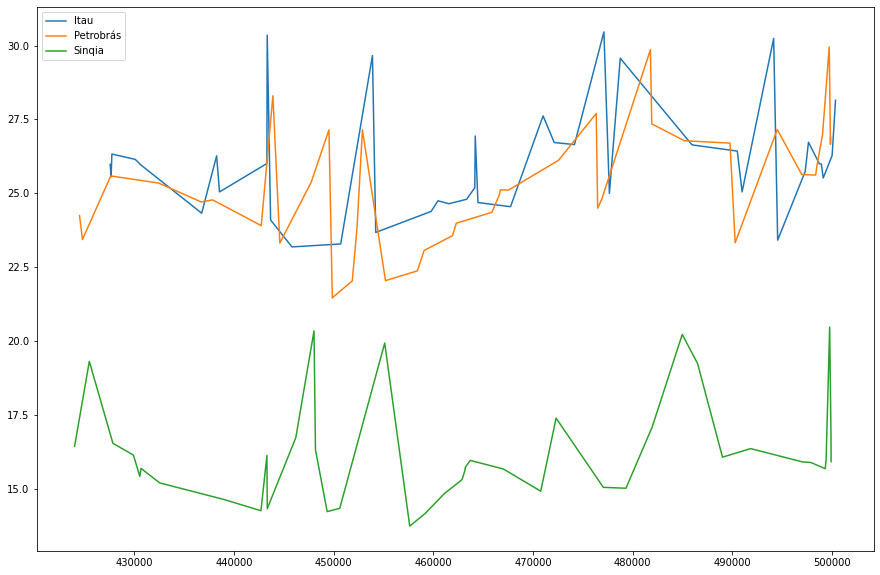

In [555]:
# grafico de tendencia
df_itau_2022['preco_fechamento'].plot(legend=True, label='Itau', figsize=(15,10))
df_petro_2022['preco_fechamento'].plot(legend=True, label='Petrobrás', figsize=(15,10))
df_sinq_2022['preco_fechamento'].plot(legend=True, label='Sinqia', figsize=(15,10))

In [557]:
# media móvel
df_itau_2022['mm7'] = df_itau_2022['preco_fechamento'].rolling(7).mean()
df_petro_2022['mm7'] = df_petro_2022['preco_fechamento'].rolling(7).mean()
df_sinq_2022['mm7'] = df_sinq_2022['preco_fechamento'].rolling(7).mean()

In [583]:
# médias móveis de 15 e 30 dias
dias = [15, 30]
for dia in dias:
  df_itau_2022['mm'+str(dia)] = df_itau_2022['preco_fechamento'].rolling(dia).mean()
  df_petro_2022['mm'+str(dia)] = df_petro_2022['preco_fechamento'].rolling(dia).mean()
  df_sinq_2022['mm'+str(dia)] = df_sinq_2022['preco_fechamento'].rolling(dia).mean()

<AxesSubplot:>

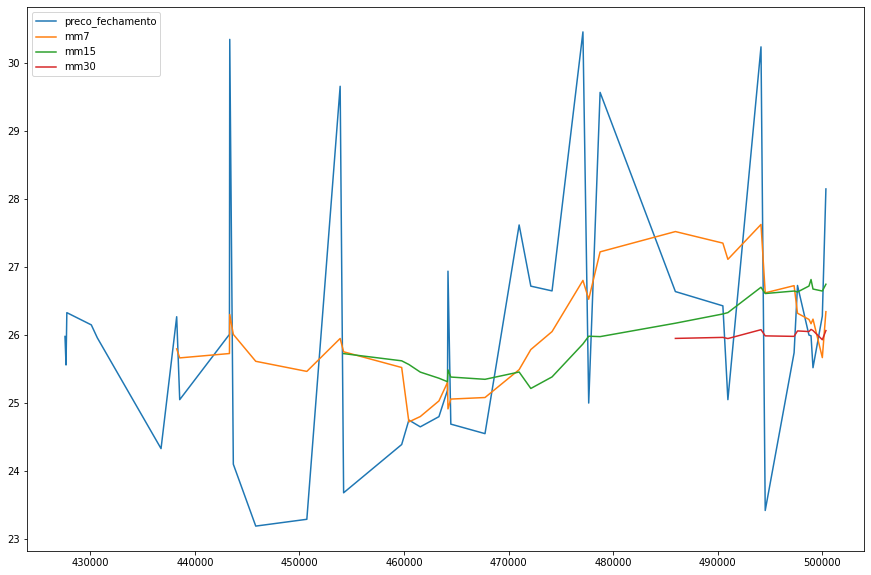

In [584]:
# grafico  de tendencia e media movel
df_itau_2022[['preco_fechamento','mm7','mm15','mm30']].plot(legend= True, label = 'Itau', figsize=(15,10))

<AxesSubplot:>

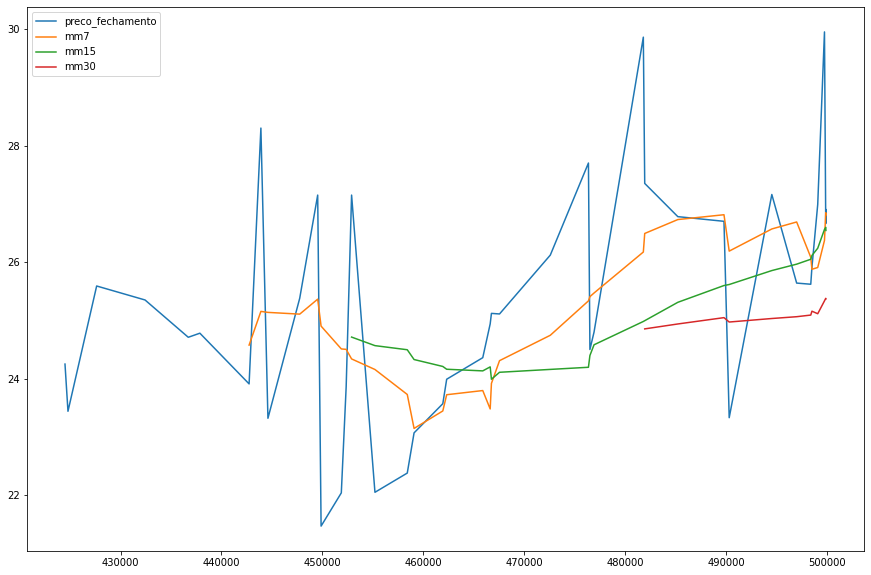

In [585]:
# grafico de tendencia e media movel
df_petro_2022[['preco_fechamento','mm7','mm15','mm30']].plot(legend= True, label = 'Petrobrás', figsize=(15,10))

<AxesSubplot:>

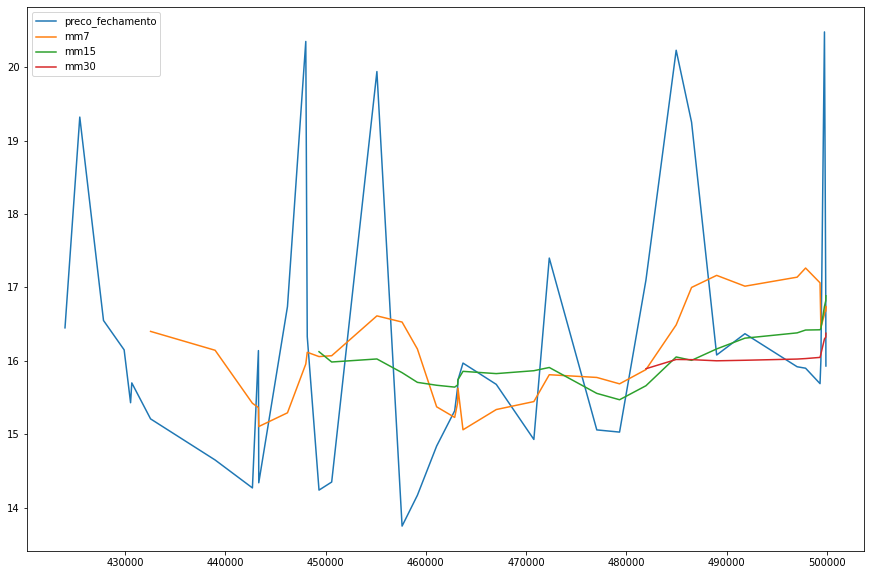

In [586]:
# grafico  de tendencia e media movel
df_sinq_2022[['preco_fechamento','mm7','mm15','mm30']].plot(legend= True, label = 'Sinqia', figsize=(15,10))

In [565]:
# calculo de retorno diario
df_itau_2022['retorno_diario'] = df_itau_2022['preco_fechamento'].pct_change()
df_petro_2022['retorno_diario'] = df_petro_2022['preco_fechamento'].pct_change()
df_sinq_2022['retorno_diario'] = df_sinq_2022['preco_fechamento'].pct_change()

<AxesSubplot:>

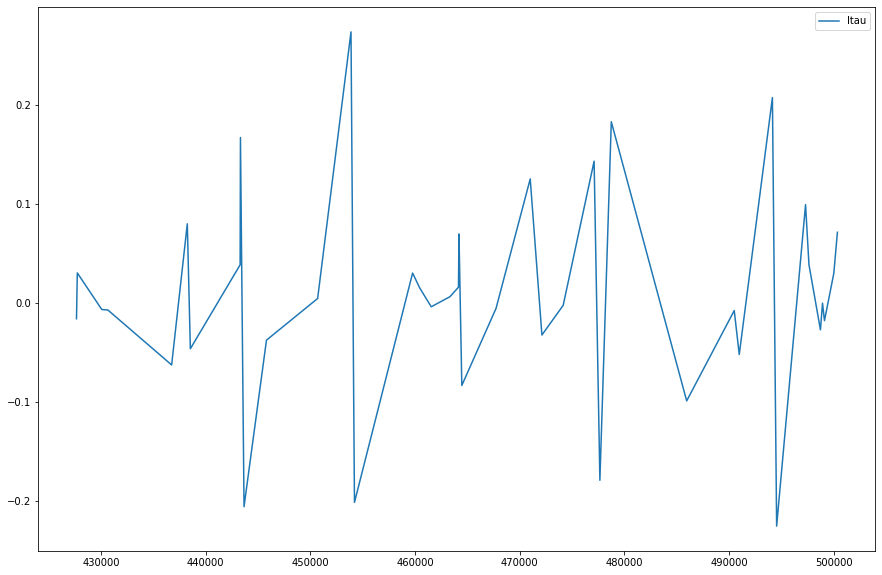

In [566]:
# grafico de retorno diario
df_itau_2022['retorno_diario'].plot(legend= True, label = 'Itau', figsize=(15,10))

<AxesSubplot:>

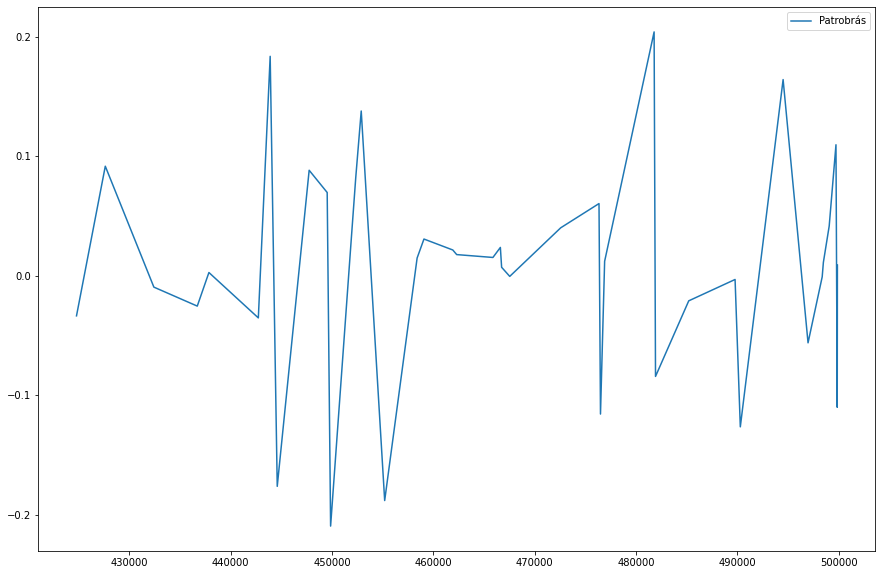

In [567]:
# grafico de retorno diario
df_petro_2022['retorno_diario'].plot(legend= True, label = 'Patrobrás', figsize=(15,10))

<AxesSubplot:>

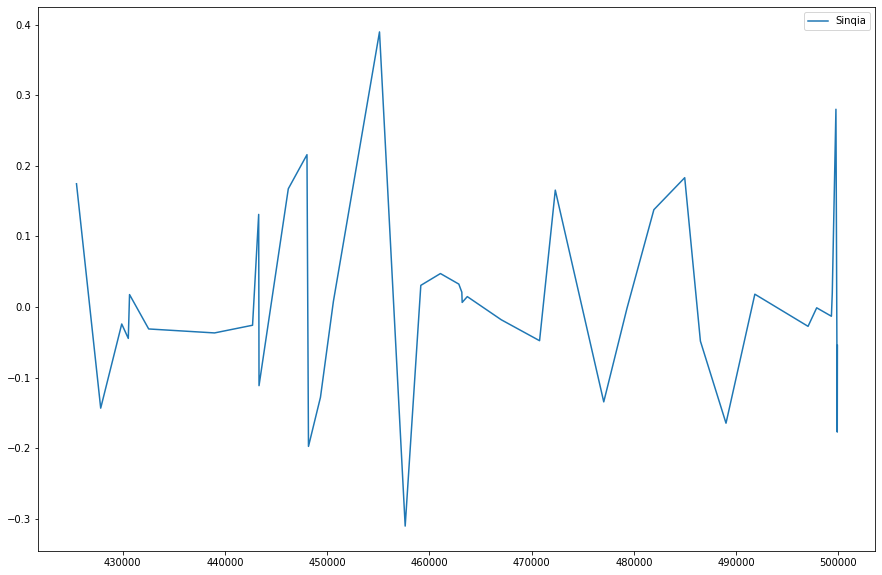

In [575]:
# grafico de retorno diario
df_sinq_2022['retorno_diario'].plot(legend= True, label = 'Sinqia', figsize=(15,10))

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

<AxesSubplot:xlabel='Retorno diario - Sinqia', ylabel='Density'>

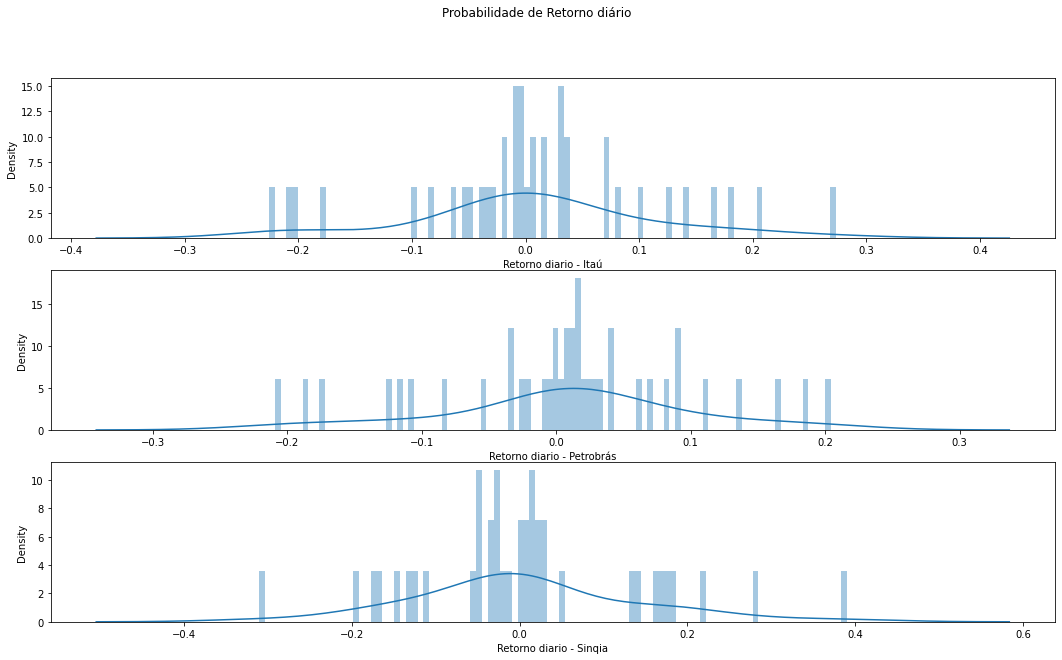

In [576]:
# grafico da probabilidade de retorno diario 

fig , axes = plt.subplots(3, figsize= (18,10))

fig.suptitle('Probabilidade de Retorno diário')

sns.distplot(df_itau_2022['retorno_diario'], bins = 100, axlabel='Retorno diario - Itaú', ax=axes[0])
sns.distplot(df_petro_2022['retorno_diario'], bins = 100, axlabel='Retorno diario - Petrobrás', ax=axes[1])
sns.distplot(df_sinq_2022['retorno_diario'], bins = 100, axlabel='Retorno diario - Sinqia', ax=axes[2])

In [577]:
# analise de correlação 

df_all = pd.DataFrame({'Itau': df_itau_2022['preco_fechamento'],
                       'Petrobrás': df_petro_2022['preco_fechamento'],
                       'Sinqia': df_sinq_2022['preco_fechamento']})

corr = df_all.corr()

corr

,Itau,Petrobrás,Sinqia
Itau,1.0,NaN,NaN
Petrobrás,NaN,1.0,NaN
Sinqia,NaN,NaN,1.0


<AxesSubplot:>

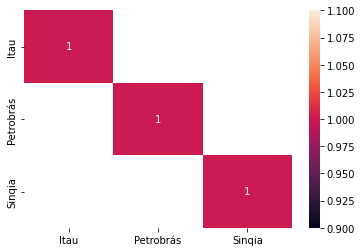

In [578]:
# heatmap
sns.heatmap(corr, annot=True)


In [579]:
# risco x retorno
retorno_itau = df_itau_2022.retorno_diario.dropna().mean()
risco_itau = df_itau_2022.retorno_diario.dropna().std()

retorno_petro = df_petro_2022.retorno_diario.dropna().mean()
risco_petro = df_petro_2022.retorno_diario.dropna().std()

retorno_sinq = df_sinq_2022.retorno_diario.dropna().mean()
risco_sinq = df_sinq_2022.retorno_diario.dropna().std()


In [580]:
print('Retorno Itau: ', retorno_itau, 'Risco Itaú: ', risco_itau)
print('Retorno Petrobrás: ', retorno_petro, 'Risco Petrobrás: ', risco_petro)
print('Retorno Sinqia: ', retorno_sinq, 'Risco Sinqia: ', risco_sinq)

Retorno Itau:  0.007559194197246713 Risco Itaú:  0.10630312182640594
Retorno Petrobrás:  0.006875998812494405 Risco Petrobrás:  0.09272556281406555
Retorno Sinqia:  0.00791007877014844 Risco Sinqia:  0.13506323555316205


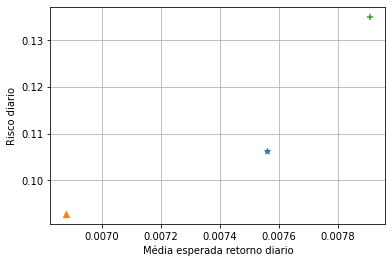

In [581]:
# gráfico risco x retorno

plt.grid()
plt.xlabel('Média esperada retorno diario')
plt.ylabel('Risco diario')
plt.scatter(retorno_itau, risco_itau, marker='*')
plt.scatter(retorno_petro, risco_petro, marker='^')
plt.scatter(retorno_sinq, risco_sinq, marker='+')